In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path ='/content/drive/MyDrive/stock.csv'
df = pd.read_csv(file_path)

df

,Date,Close,High,Low,Open,Volume,EPS,Revenue,ROE,P/E
0,2010-01-04 00:00:00-05:00,6.447413,6.462175,6.398307,6.429940,493729600,6.07,391034994688,1.57413,40.006588
1,2010-01-05 00:00:00-05:00,6.458559,6.495012,6.424516,6.465187,601904800,6.07,391034994688,1.57413,40.006588
2,2010-01-06 00:00:00-05:00,6.355827,6.484167,6.349199,6.458559,552160000,6.07,391034994688,1.57413,40.006588
3,2010-01-07 00:00:00-05:00,6.344075,6.386855,6.297981,6.379323,477131200,6.07,391034994688,1.57413,40.006588
4,2010-01-08 00:00:00-05:00,6.386253,6.386856,6.298284,6.335641,447610800,6.07,391034994688,1.57413,40.006588
...,...,...,...,...,...,...,...,...,...,...
3753,2024-12-02 00:00:00-05:00,239.589996,240.789993,237.160004,237.270004,48137100,6.07,391034994688,1.57413,40.006588
3754,2024-12-03 00:00:00-05:00,242.649994,242.759995,238.899994,239.809998,38861000,6.07,391034994688,1.57413,40.006588
3755,2024-12-04 00:00:00-05:00,243.009995,244.110001,241.250000,242.869995,44383900,6.07,391034994688,1.57413,40.006588
3756,2024-12-05 00:00:00-05:00,243.039993,244.539993,242.130005,243.990005,40033900,6.07,391034994688,1.57413,40.006588


IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

Visualizing Closing Price

<ipython-input-4-2f3bfac1daf1>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])  # Only if not already datetime


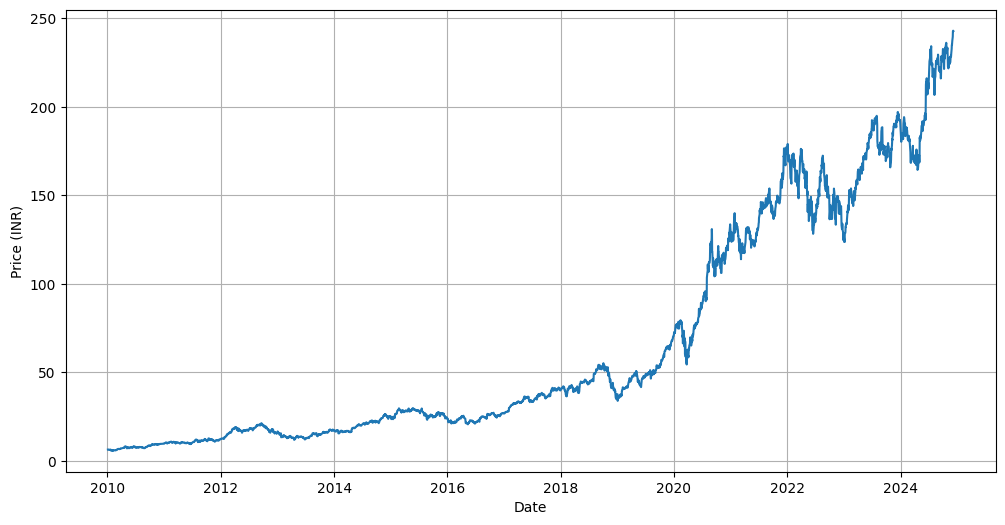

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Only if not already datetime
df.set_index('Date', inplace=True)       # Set Date as index

plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
# plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()


In [ ]:
df

,Close,High,Low,Open,Volume,EPS,Revenue,ROE,P/E
Date,,,,,,,,,
2010-01-04 00:00:00-05:00,6.447413,6.462175,6.398307,6.429940,493729600,6.07,391034994688,1.57413,40.006588
2010-01-05 00:00:00-05:00,6.458559,6.495012,6.424516,6.465187,601904800,6.07,391034994688,1.57413,40.006588
2010-01-06 00:00:00-05:00,6.355827,6.484167,6.349199,6.458559,552160000,6.07,391034994688,1.57413,40.006588
2010-01-07 00:00:00-05:00,6.344075,6.386855,6.297981,6.379323,477131200,6.07,391034994688,1.57413,40.006588
2010-01-08 00:00:00-05:00,6.386253,6.386856,6.298284,6.335641,447610800,6.07,391034994688,1.57413,40.006588
...,...,...,...,...,...,...,...,...,...
2024-12-02 00:00:00-05:00,239.589996,240.789993,237.160004,237.270004,48137100,6.07,391034994688,1.57413,40.006588
2024-12-03 00:00:00-05:00,242.649994,242.759995,238.899994,239.809998,38861000,6.07,391034994688,1.57413,40.006588
2024-12-04 00:00:00-05:00,243.009995,244.110001,241.250000,242.869995,44383900,6.07,391034994688,1.57413,40.006588


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
Date,
2010-01-04 00:00:00-05:00,NaN
2010-01-05 00:00:00-05:00,NaN
2010-01-06 00:00:00-05:00,NaN
2010-01-07 00:00:00-05:00,NaN
2010-01-08 00:00:00-05:00,NaN
...,...
2024-12-02 00:00:00-05:00,225.513779
2024-12-03 00:00:00-05:00,225.640075
2024-12-04 00:00:00-05:00,225.731458


Plotting moving average of 100 days

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

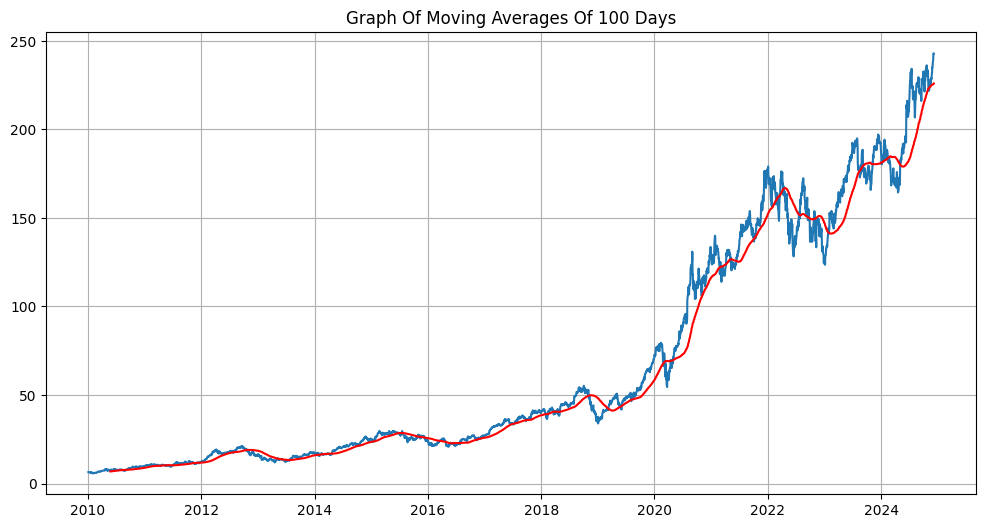

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

Defining 200 days moving averages and plotting comparision graph with 100 days moving **averages**

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
Date,
2010-01-04 00:00:00-05:00,NaN
2010-01-05 00:00:00-05:00,NaN
2010-01-06 00:00:00-05:00,NaN
2010-01-07 00:00:00-05:00,NaN
2010-01-08 00:00:00-05:00,NaN
...,...
2024-12-02 00:00:00-05:00,205.696266
2024-12-03 00:00:00-05:00,206.001253
2024-12-04 00:00:00-05:00,206.311776


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

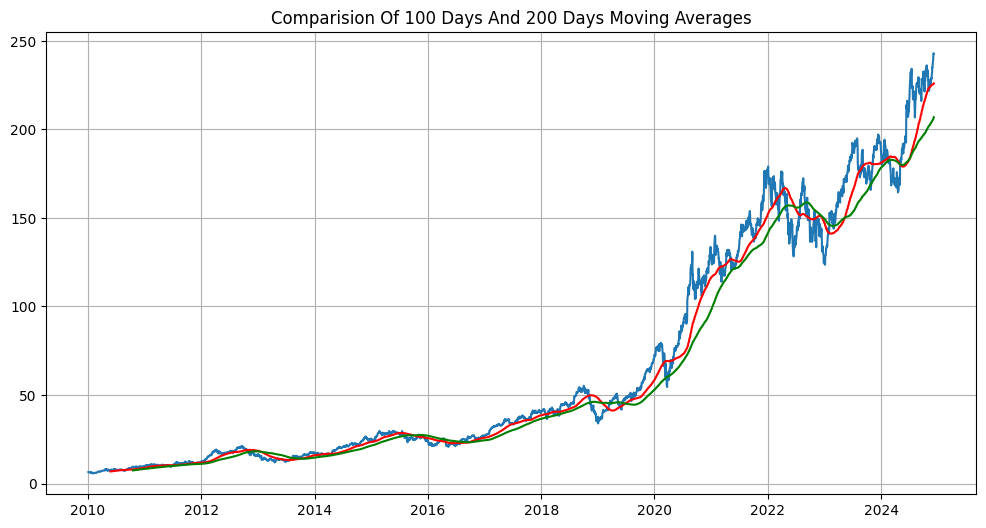

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3758, 9)

Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
train = pd.DataFrame(df[0:int(len(df) * 0.70)])
test = pd.DataFrame(df[int(len(df) * 0.70):])
print(train.shape)
print(test.shape)


(2630, 10)
(1128, 10)


In [ ]:
train.head()

,Date,Close,High,Low,Open,Volume,EPS,Revenue,ROE,P/E
0,2010-01-04 00:00:00-05:00,6.447413,6.462175,6.398307,6.429940,493729600,6.07,391034994688,1.57413,40.006588
1,2010-01-05 00:00:00-05:00,6.458559,6.495012,6.424516,6.465187,601904800,6.07,391034994688,1.57413,40.006588
2,2010-01-06 00:00:00-05:00,6.355827,6.484167,6.349199,6.458559,552160000,6.07,391034994688,1.57413,40.006588
3,2010-01-07 00:00:00-05:00,6.344075,6.386855,6.297981,6.379323,477131200,6.07,391034994688,1.57413,40.006588
4,2010-01-08 00:00:00-05:00,6.386253,6.386856,6.298284,6.335641,447610800,6.07,391034994688,1.57413,40.006588


In [ ]:
test.head()

,Date,Close,High,Low,Open,Volume,EPS,Revenue,ROE,P/E
2630,2020-06-16 00:00:00-04:00,85.767906,86.040748,83.974988,85.616873,165428800,6.07,391034994688,1.57413,40.006588
2631,2020-06-17 00:00:00-04:00,85.648537,86.576665,85.526735,86.515764,114406400,6.07,391034994688,1.57413,40.006588
2632,2020-06-18 00:00:00-04:00,85.682648,86.101646,85.071201,85.604693,96820400,6.07,391034994688,1.57413,40.006588
2633,2020-06-19 00:00:00-04:00,85.193016,86.859263,84.079746,86.391549,264476000,6.07,391034994688,1.57413,40.006588
2634,2020-06-22 00:00:00-04:00,87.421989,87.565715,85.541370,85.587655,135445200,6.07,391034994688,1.57413,40.006588


Using MinMax scaler for normalization of the dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00800111],
       [0.0084456 ],
       [0.00836201],
       ...,
       [1.        ],
       [0.9858995 ],
       [0.95066312]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2530, 100, 1)

ML Model (LSTM)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

changes

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from keras.optimizers import Adam

model = Sequential()

# Use Input layer to avoid warnings
model.add(Input(shape=(x_train.shape[1], 1)))

# LSTM + Dropout layers (use default 'tanh' activation for stability)
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Compile with stable optimizer
optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 36s 320ms/step - loss: 0.0536 - mean_absolute_error: 0.1615
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 332ms/step - loss: 0.0040 - mean_absolute_error: 0.0421
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 324ms/step - loss: 0.0037 - mean_absolute_error: 0.0397
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0037 - mean_absolute_error: 0.0383
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - loss: 0.0028 - mean_absolute_error: 0.0340
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 310ms/step - loss: 0.0035 - mean_absolute_error: 0.0382
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 315ms/step - loss: 0.0027 - mean_absolute_error: 0.0331
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - loss: 0.0027 - mean_absolute_error: 0.0331
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - loss: 0.0029 - mean_absolute_error: 0.0348
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 314ms/step - loss: 0.0025 - mean_absolute_error: 0.0322
Epoch 11/

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1128, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,77.054474
1,77.619179
2,75.149445
3,75.765060
4,78.637169


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11477093],
       [0.11776546],
       [0.10466891],
       ...,
       [0.99406079],
       [1.        ],
       [0.99427294]])

In [ ]:
input_data.shape

(1228, 1)

Testing the model

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1128, 100, 1)
(1128,)


In [ ]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step


In [ ]:
y_pred.shape

(1128, 1)

In [ ]:
y_test

array([0.1601758 , 0.16494245, 0.1601112 , ..., 0.99406079, 1.        ,
       0.99427294])

Making prediction and plotting the graph of predicted vs actual values

In [ ]:
y_pred

array([[0.13118623],
       [0.13382031],
       [0.13668765],
       ...,
       [0.90220755],
       [0.911974  ],
       [0.92248243]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00530282])

In [ ]:
scale_factor = 1/0.00530282
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

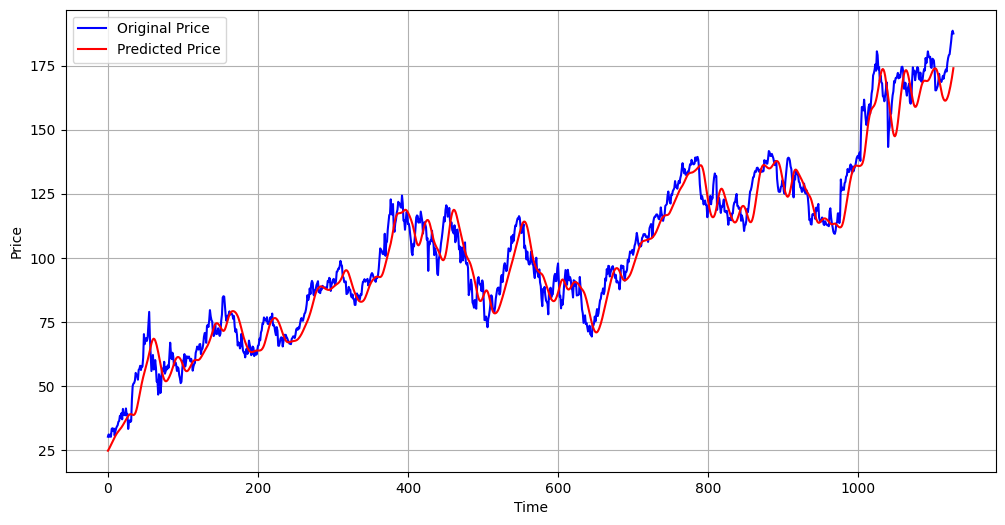

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.51%


Making prediction and plotting the graph of predicted vs actual values

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.955527146363917


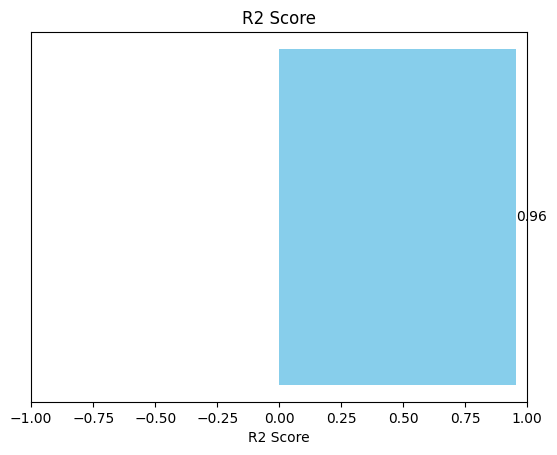

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

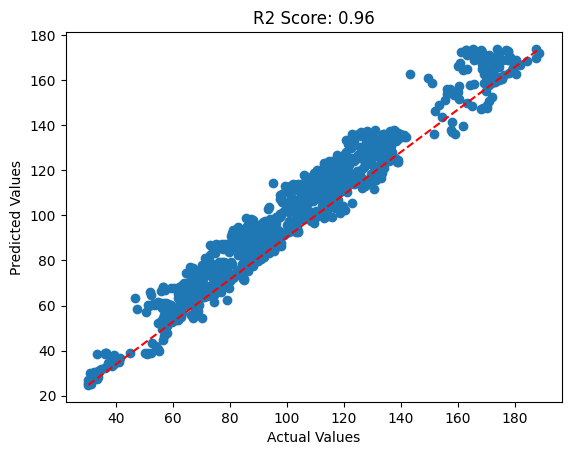

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()